# Introduction

In [1]:
import diffusers
import huggingface_hub
import transformers

In [2]:
from genaibook.core import get_device

device = get_device()
print(f'Using device: {device}')

Using device: mps


## Generating Images

In [3]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    'stable-diffusion-v1-5/stable-diffusion-v1-5',
    torch_dtype=torch.float16,
    variant='fp16',
).to(device)

/Users/federico/.pyenv/versions/3.12.7/envs/genaibook-env/lib/python3.12/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

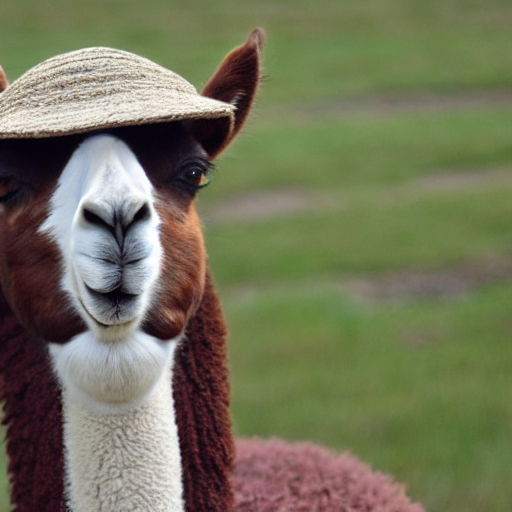

In [9]:
prompt = 'a lama with a hat'
pipe(prompt).images[0]

## Generating Text

In [10]:
from transformers import pipeline

classifier = pipeline('text-classification', device=device)
classifier('This movie is very good!')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps


[{'label': 'POSITIVE', 'score': 0.9998670816421509}]

In [11]:
generator = pipeline('text-generation')
prompt = 'There was a lama with a cool hat'
generator(prompt)[0]['generated_text']

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


"There was a lama with a cool hat who was dressed in a hoodie and a purple tank top. I had a lot of fun making my way down the street to the mall. It was fun getting to know the kids from the school in the mall and everyone from the students to the mall staff. It was a great experience.\n\nI was a little nervous about going there because we had a big, tall, tall mall in the middle of nowhere. It would be like 20 minutes to the mall at any other time. I was nervous at first because I'd been to the mall for all of my life, but I was nervous that I would have to go to the mall to find a place in front of the mall, but that didn't bother me at all.\n\nAfter I left the mall, I headed back to the city. I didn't think of it that way at all. I found a place where I could stay and get away from the mall.\n\nWe did get a little bit of time to find a place that would allow me to spend more time down the street. It was a little bit of a struggle. I had to take care of myself, but I felt like I had

## Generating Sound Clips

In [12]:
pipe = pipeline('text-to-audio', model='facebook/musicgen-small', device=device)

Device set to use mps


In [13]:
data = pipe('electric rock solo, very intense')

`torch.nn.functional.scaled_dot_product_attention` does not support having an empty attention mask. Falling back to the manual attention implementation. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.Note that this probably happens because `guidance_scale>1` or because you used `get_unconditional_inputs`. See https://github.com/huggingface/transformers/issues/31189 for more information.


In [14]:
import IPython.display as ipd

display(ipd.Audio(data['audio'][0], rate=data['sampling_rate']))